In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("MultiJetRun2010B.csv")
df.columns = df.columns.str.strip()
target = "HT"
features=["Run","Lumi","Event","MR","Rsq","E1","Px1","Py1","Pz1","E2","Px2","Py2","Pz2","MET","nJets","nBJets"]
y = df.HT
x = df[features]

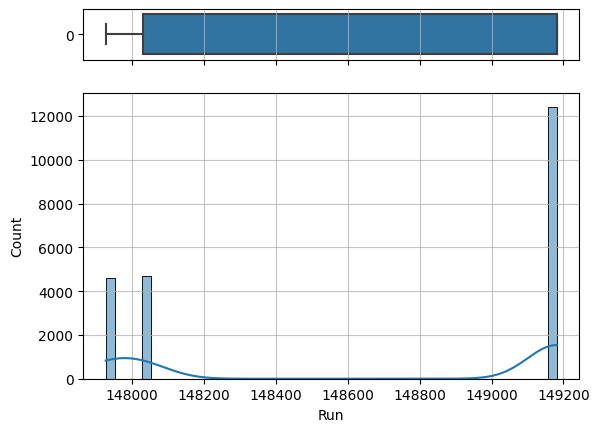

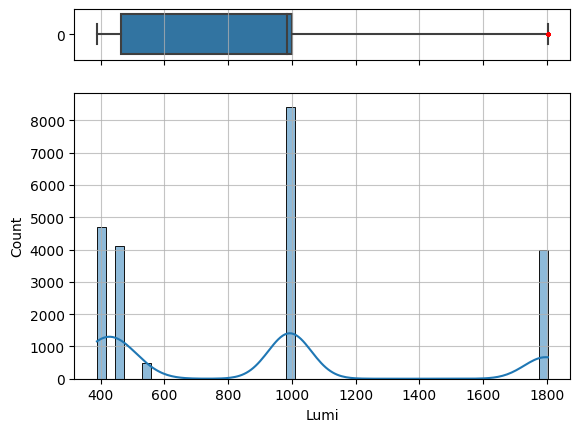

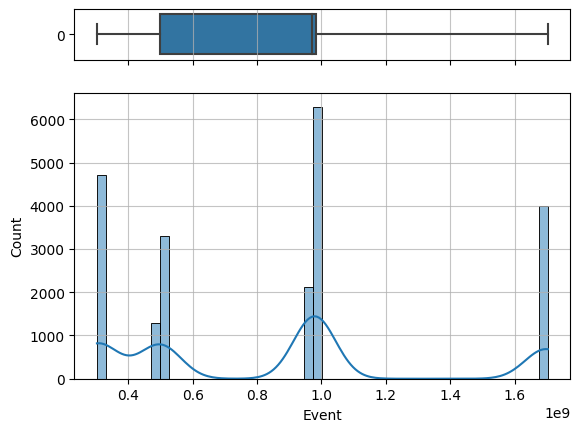

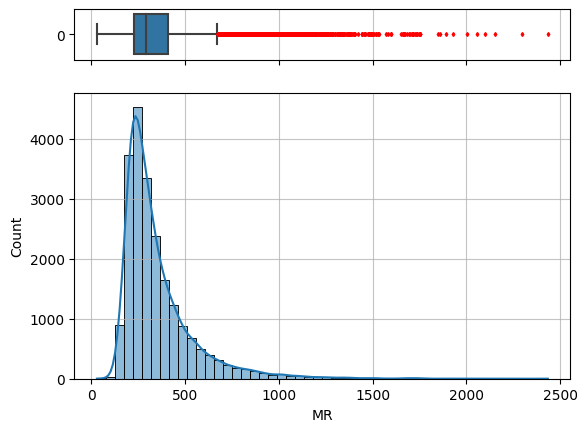

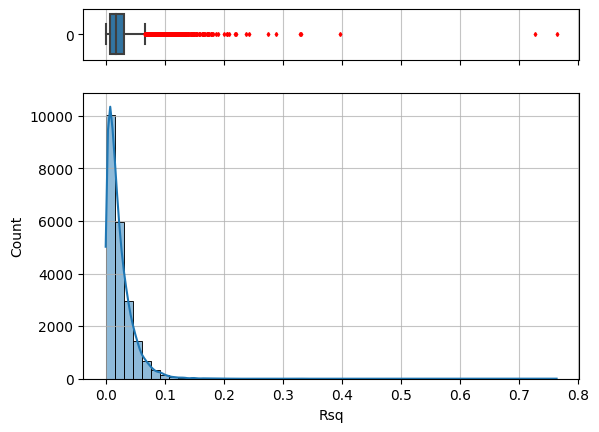

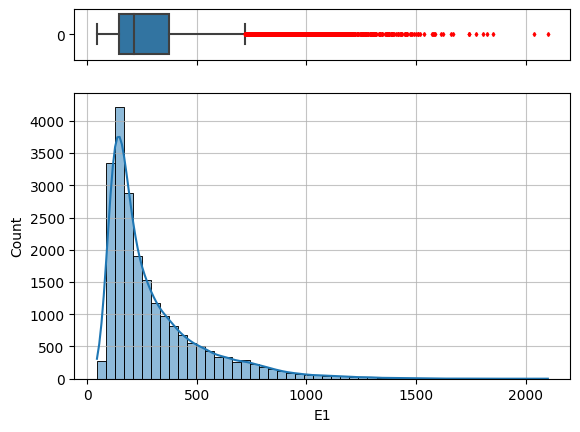

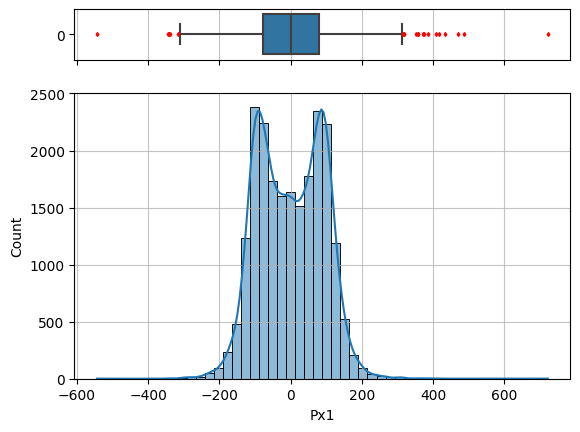

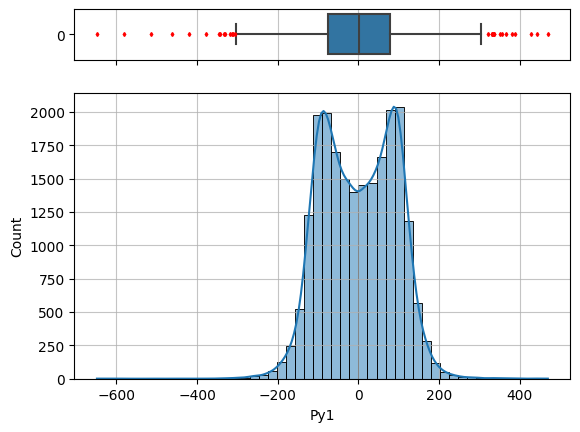

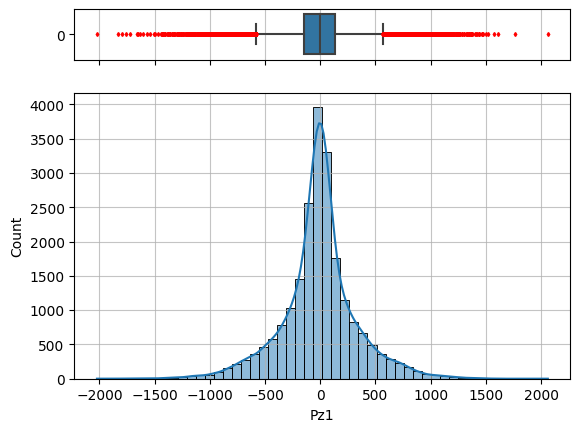

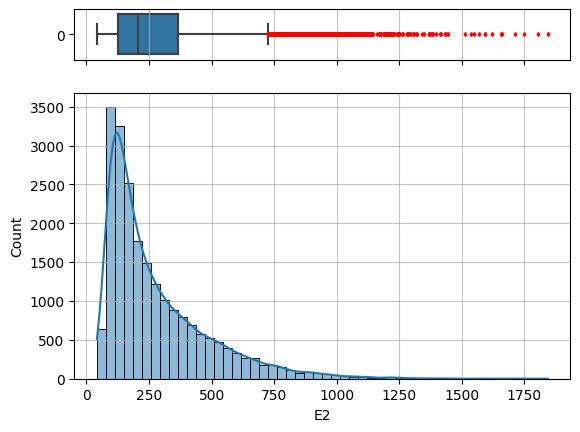

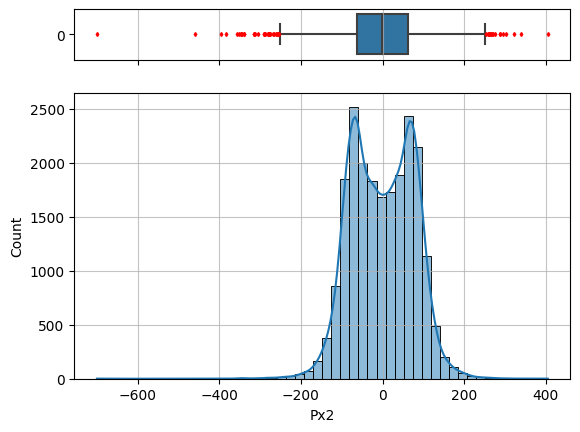

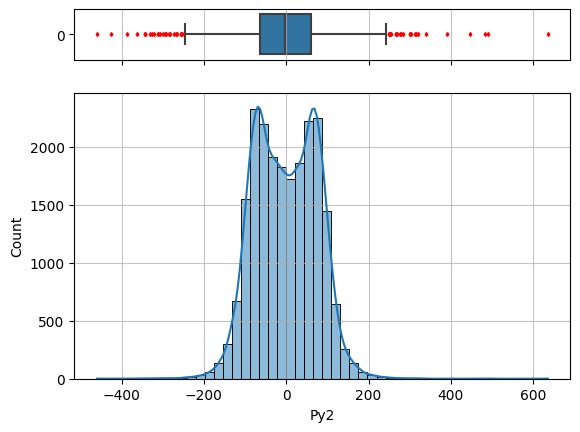

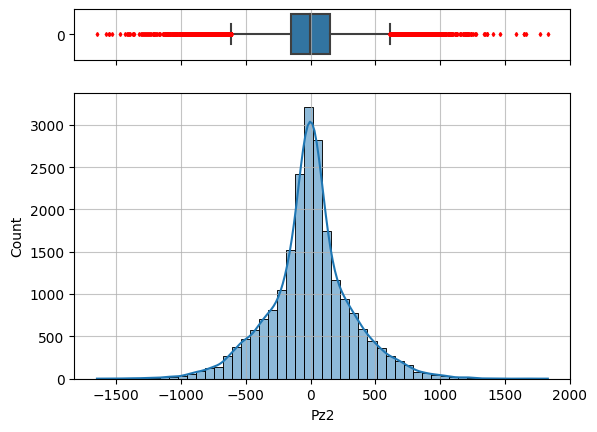

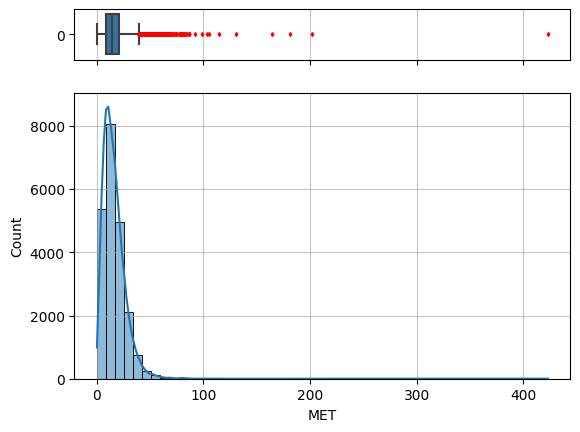

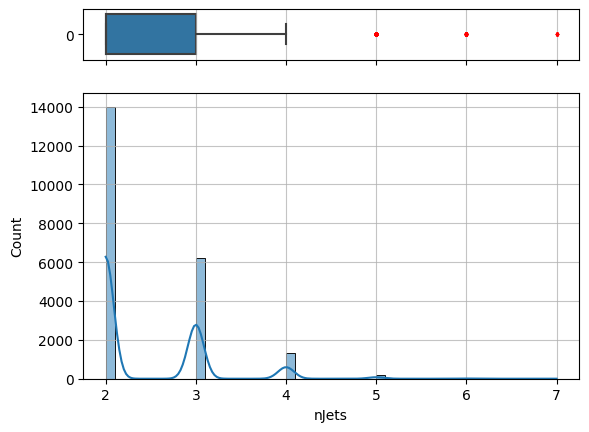

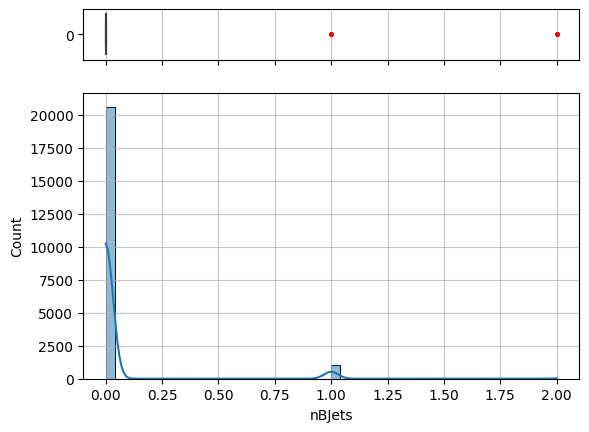

In [3]:
for f in features:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
    ax_box.grid(alpha=0.75)
    ax_hist.grid(alpha=0.75)
    flierprops = dict(
        markerfacecolor="r", markersize=2, linestyle="none", markeredgecolor="r"
    )
    sns.boxplot(df[f], orient="h", ax=ax_box, flierprops=flierprops)
    sns.histplot(df[f], ax=ax_hist, bins=50, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.show()

In [4]:
numerical_features = ["MR","Rsq","E1","Px1","Py1","Pz1","E2","Px2","Py2","Pz2","MET"]

we need to remove outliers from the dataset

In [5]:
print(len(df))
for f in numerical_features:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + iqr *1.5
    lower_limit = q1 - iqr *1.5
    new_df = df.loc[((df[f]<upper_limit) & (df[f]>lower_limit))]
print(len(new_df), len(df)-len(new_df))
df = new_df

21726
21129 597


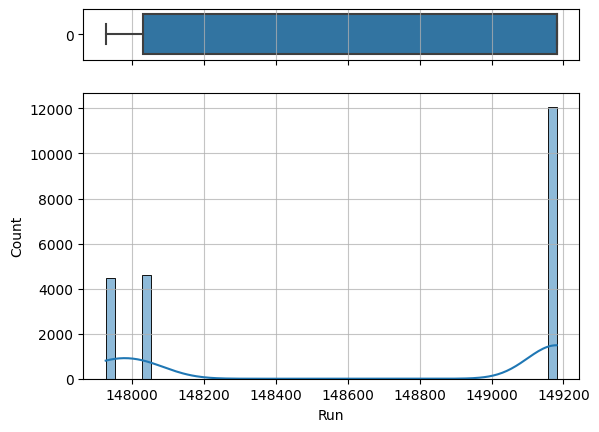

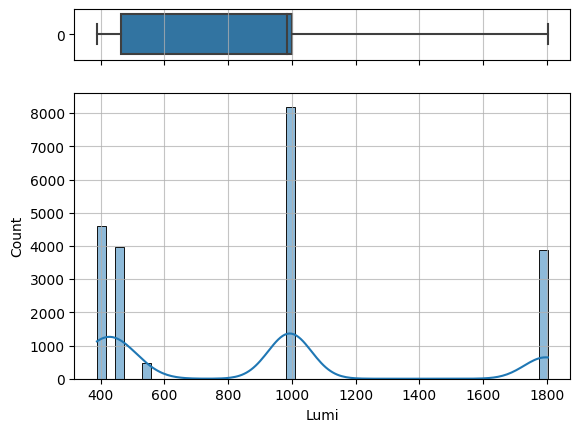

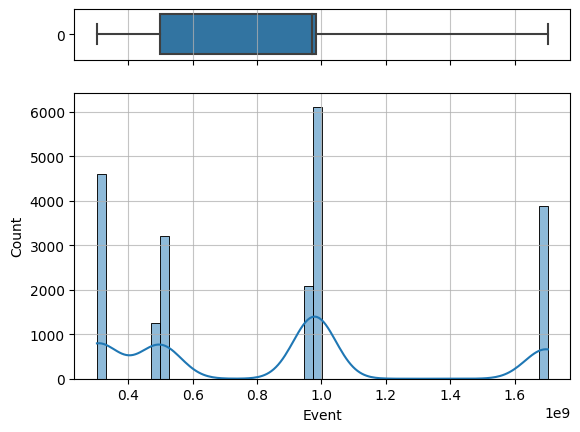

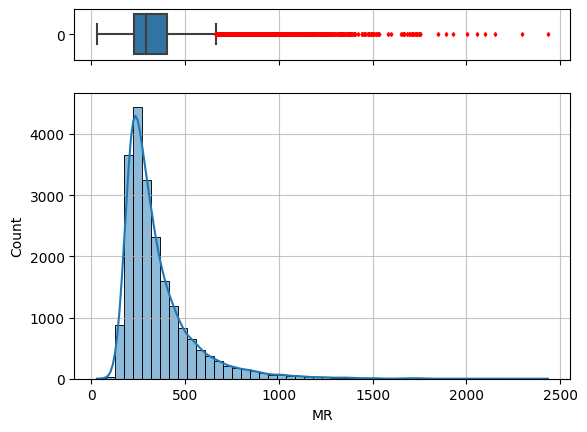

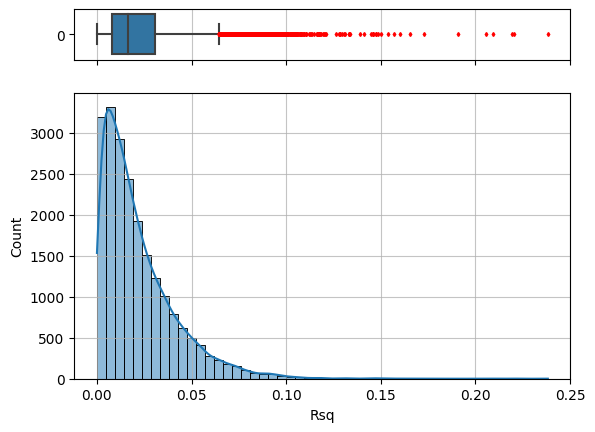

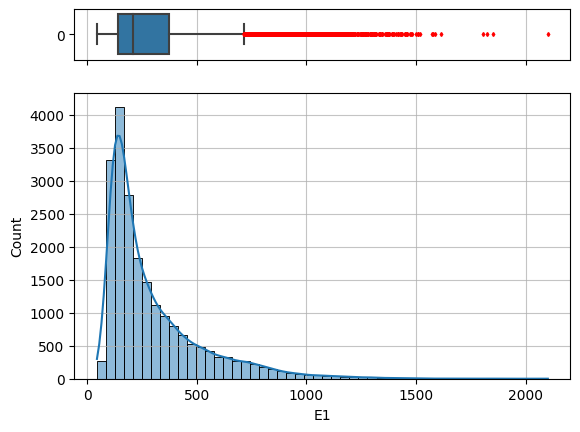

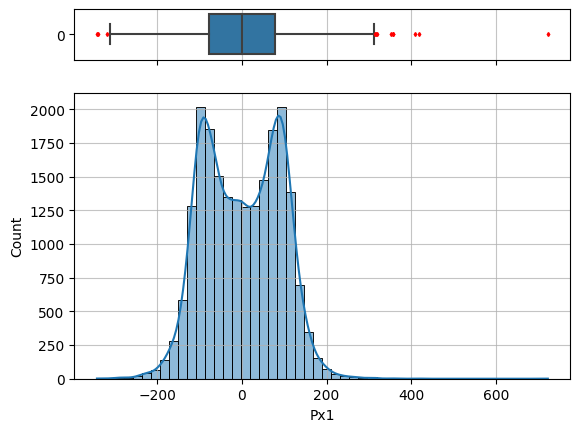

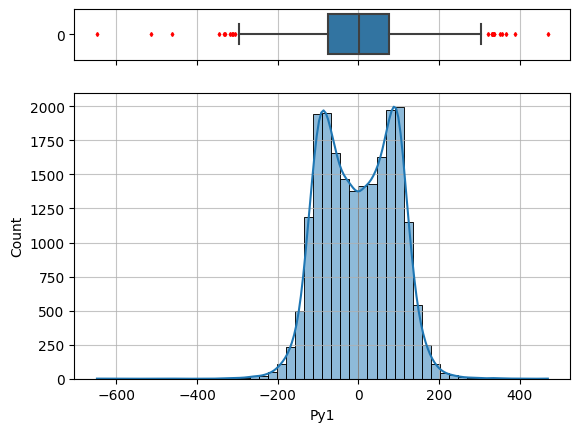

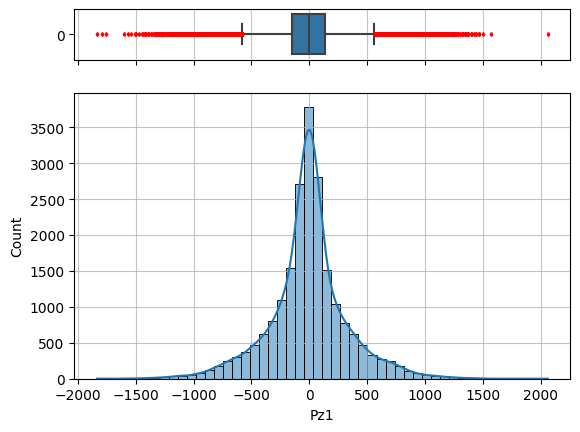

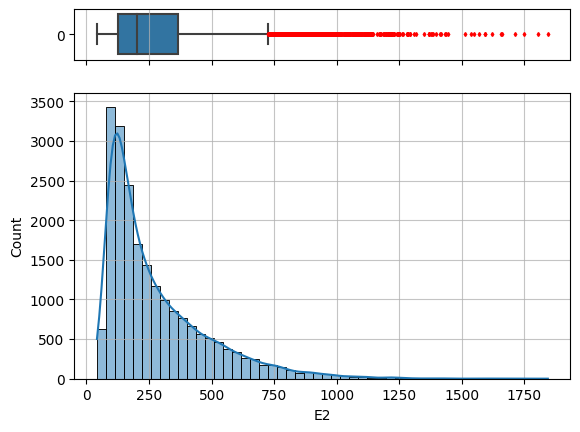

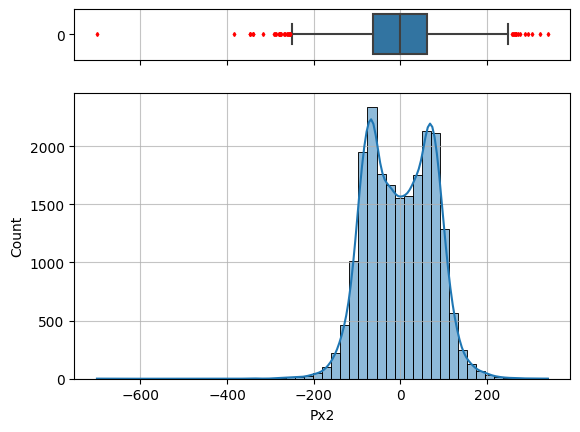

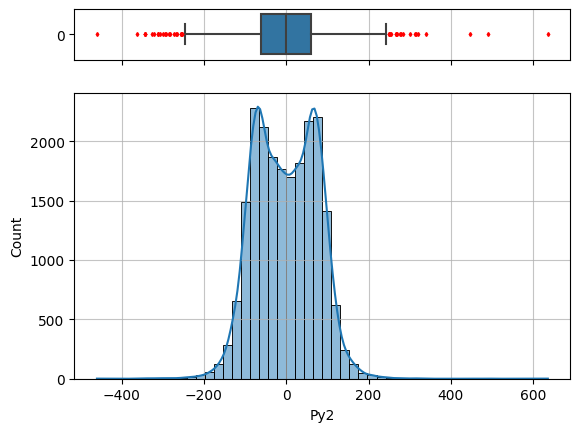

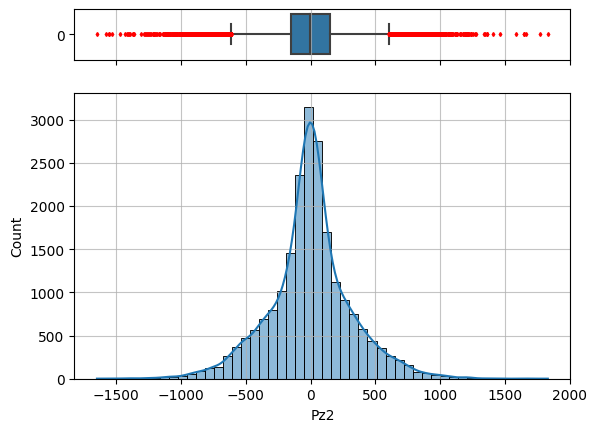

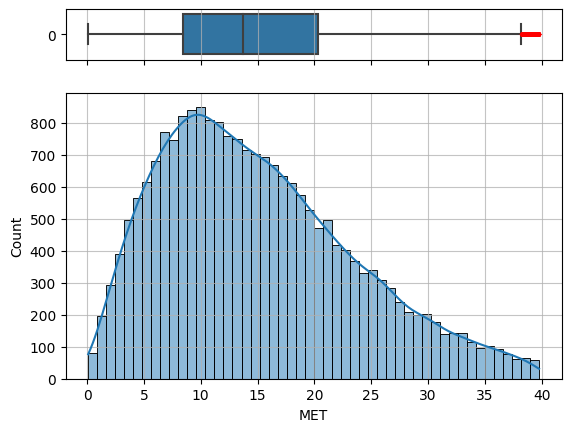

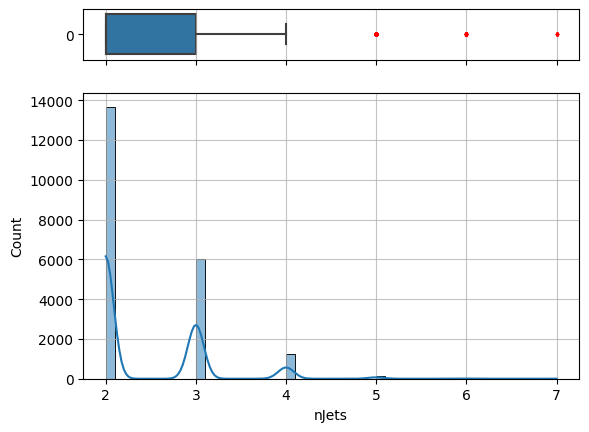

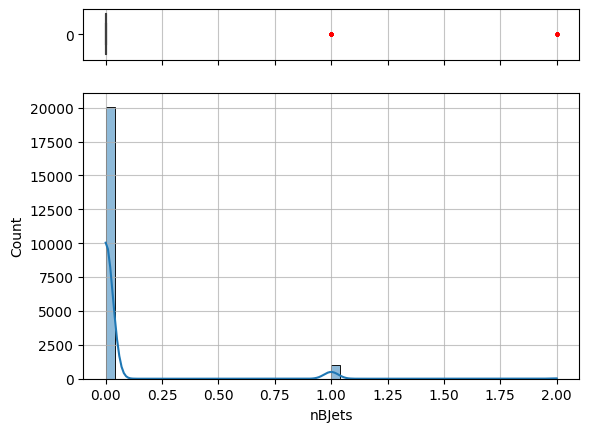

In [6]:
for f in features:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
    ax_box.grid(alpha=0.75)
    ax_hist.grid(alpha=0.75)
    flierprops = dict(
        markerfacecolor="r", markersize=2, linestyle="none", markeredgecolor="r"
    )
    sns.boxplot(new_df[f], orient="h", ax=ax_box, flierprops=flierprops)
    sns.histplot(new_df[f], ax=ax_hist, bins=50, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.show()

lets add new features based on physics like product momentum along the same axis and total energy

In [7]:
df["total energy"] = df["E1"] + df["E2"]

In [8]:
df["px12"] = df["Px1"] * df["Px2"] 
df["py12"] = df["Py1"] * df["Py2"]
df["pz12"] = df["Pz1"] * df["Pz2"]

In [9]:
df = df.drop(["Px1", "Px2", "Py1", "Py2","Py1", "Py2", "E1", "E2"],"columns" )
df = df.drop(["Pz1", "Pz2"], "columns")

C:\Users\yusuf\AppData\Local\Temp\ipykernel_13524\189880182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Px1", "Px2", "Py1", "Py2","Py1", "Py2", "E1", "E2"],"columns" )
C:\Users\yusuf\AppData\Local\Temp\ipykernel_13524\189880182.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Pz1", "Pz2"], "columns")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21725
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           21129 non-null  int64  
 1   Lumi          21129 non-null  int64  
 2   Event         21129 non-null  int64  
 3   MR            21129 non-null  float64
 4   Rsq           21129 non-null  float64
 5   HT            21129 non-null  float64
 6   MET           21129 non-null  float64
 7   nJets         21129 non-null  int64  
 8   nBJets        21129 non-null  int64  
 9   total energy  21129 non-null  float64
 10  px12          21129 non-null  float64
 11  py12          21129 non-null  float64
 12  pz12          21129 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.8 MB


In [11]:
numerical_features = ["MR", "Rsq", "MET", "total energy", "px12", "py12", "pz12"]
categorical_features = ["Run", "Lumi", "Event", "nJets", "nBJets"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

,MR,Rsq,MET,total energy,px12,py12,pz12
0,-0.700584,0.512054,0.390299,-0.977412,-0.123613,0.488252,-0.024127
1,-1.015016,1.031349,-0.028324,-1.382498,0.087557,0.751355,-0.094478
2,0.267095,0.255049,1.208308,0.721038,-1.016370,-0.302314,0.442162
4,-0.758323,-0.159897,-0.816875,2.355614,-0.292094,0.712413,3.196118
5,-0.449969,-0.897372,-1.460268,0.635257,-0.042721,0.204852,0.644297
...,...,...,...,...,...,...,...
21720,0.037098,-0.121032,0.541883,-0.098598,0.308285,-0.160794,-0.095715
21722,-0.070518,0.331270,0.959914,-0.765431,0.768910,-1.276045,-0.196724
21723,0.705555,-1.072159,-1.337583,0.362487,0.426064,0.647640,-0.626347
21724,-0.699748,1.729148,0.703340,1.526413,0.030107,0.241519,2.312790


In [12]:
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_encode = OneHotEncoder()
df[categorical_features]= pd.get_dummies(df[categorical_features])
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21725
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           21129 non-null  int64  
 1   Lumi          21129 non-null  int64  
 2   Event         21129 non-null  int64  
 3   MR            21129 non-null  float64
 4   Rsq           21129 non-null  float64
 5   HT            21129 non-null  float64
 6   MET           21129 non-null  float64
 7   nJets         21129 non-null  int64  
 8   nBJets        21129 non-null  int64  
 9   total energy  21129 non-null  float64
 10  px12          21129 non-null  float64
 11  py12          21129 non-null  float64
 12  pz12          21129 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.8 MB


In [13]:
features = ["MR", "Rsq", "MET", "total energy", "px12", "py12", "pz12", "nJets", "nBJets"]
df = df.drop(["Run", "Lumi", "Event"], "columns")
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=42, train_size=0.75)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_13524\3562386459.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Run", "Lumi", "Event"], "columns")


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred )

0.8453666522980336

In [15]:
lasso_ = Lasso(alpha=0.1)
lasso_.fit(X_train, y_train)

Lasso(alpha=0.1)

In [16]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
r2_score(y_test, y_pred)

0.9080347461905472

In [17]:
from sklearn.metrics import mean_absolute_error
for i in range(len(random_forest.feature_importances_)):
    print(random_forest.feature_names_in_[i], random_forest.feature_importances_[i], "\n")
    

MR 0.029933599827049812 

Rsq 0.009070573143481957 

MET 0.01013041375973115 

total energy 0.02345159653343539 

px12 0.41824738630201425 

py12 0.3777402882050616 

pz12 0.009810675444247265 

nJets 0.11987579987644864 

nBJets 0.0017396669085299377 



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from xgboost import XGBClassifier
from sklearn import svm
model_params = {
     
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10, 25]
        }
    }
        
     
 }

In [19]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_2

,model,best_score,best_params
0,lasso,0.827056,"{'alpha': 1, 'selection': 'cyclic'}"
1,random_forest,0.893437,{'n_estimators': 25}


C:\Users\yusuf\AppData\Local\Temp\ipykernel_13524\1866178079.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  _newdf = df.drop(["px12", "pz12", "nBJets"], "columns")


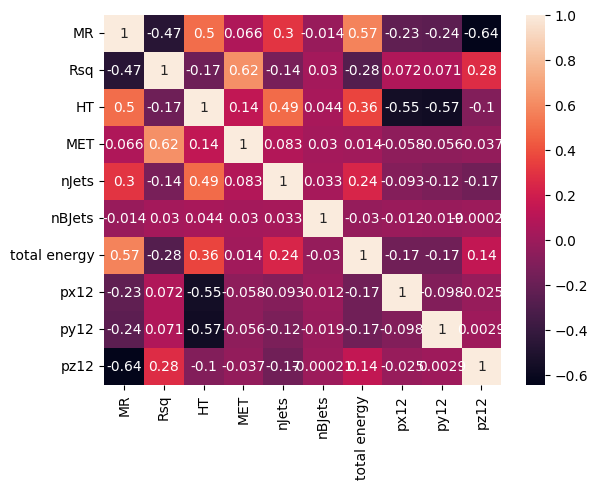

In [20]:
sns.heatmap(df.corr(), annot=True)
df.corr()[target].sort_values()
_newdf = df.drop(["px12", "pz12", "nBJets"], "columns")

In [21]:
new_features = ["MR", "Rsq", "MET", "nJets", "total energy", "py12"]
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(df[new_features], df[target], random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x_2_train,y_2_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df_3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_3


,model,best_score,best_params
0,lasso,0.570852,"{'alpha': 1, 'selection': 'random'}"
1,random_forest,0.761687,{'n_estimators': 25}


In [23]:
y_pred = clf.best_estimator_.predict(x_2_test)
r2_score(y_pred, y_test)

0.6951377130891492